In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

#df.to_numpy() converts df to numpy array without column names

In [3]:
df=pd.read_csv(r'D:\datasets\Heart_attack_risk_prediction.csv')
df.head()#pathlocation where right slash is there

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
df.shape

(43400, 12)

In [4]:
#step`1:remove irrelevant features
#remove a column based on drop method

#shift+tab to know meaning of a function

In [4]:
df1=df.copy()##copy original dataset


In [5]:
df1.drop(columns=['Patient_ID'],inplace=True)

In [6]:
df1.head()

,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [5]:
df1.describe().head(8)
#what does mean heart disease of 0.04 mean?#what does mean hyperttension of 0.09 mean?
#1 means that patient has history of ht,0 means that patient has no ht.0.09 means?
#hypertension and heart disease have categories(0 and 1) which must have dtype of object.

,Age,HyperTension,Heart_Disease,Glucose_Levels,BMI_Values,Heart_Attack
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [8]:
df1.dtypes

Gender               object
Age                 float64
HyperTension          int64
Heart_Disease         int64
Is_Married           object
Employment_Type      object
Residential_type     object
Glucose_Levels      float64
BMI_Values          float64
Smoking_Habits       object
Heart_Attack          int64
dtype: object

In [ ]:
#html-layout
#script-if i give improper username,pass error willl be displayed by script


#remove irrelevent columns,do null value treatment thenchange dtypes of some columna
#use df.describe,df.isnull.sum.meanmedianmode of all columns.


In [6]:
df1[['HyperTension','Heart_Disease']]=df1[['HyperTension','Heart_Disease']].astype('object')
#as type function will change the d type of both columns to object

In [10]:
df1.dtypes.head(4)

Gender            object
Age              float64
HyperTension      object
Heart_Disease     object
dtype: object

In [17]:
#check null values
df1.isnull().sum()

Gender                  0
Age                     0
HyperTension            0
Heart_Disease           0
Is_Married              0
Employment_Type         0
Residential_type        0
Glucose_Levels          0
BMI_Values           1462
Smoking_Habits      13292
Heart_Attack            0
dtype: int64

In [ ]:
#BMI values and smoking habits have many null values
#ok 2 columns have null values.
#when the column is categorical which has n=many null values then we will impute null values with mode value
#or most relevent data


In [18]:
df1.BMI_Values.skew()      
#skewness of this col is 0.89 highly positively skewed distribution so we will do  median imputation

0.8987282500249906

In [7]:
a=df1['BMI_Values'].median()
df1['BMI_Values']=df1['BMI_Values'].fillna(a)

In [20]:
df1.BMI_Values.isnull().sum()

0

In [14]:
df1.Smoking_Habits.value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: Smoking_Habits, dtype: int64

In [ ]:
#most frequent class in the categorical variable sm habits is never smoked.So i will do mode imputation.

In [8]:
df1['Smoking_Habits']=df1['Smoking_Habits'].fillna('never smoked')

In [13]:
df1.Smoking_Habits.isnull().sum()

0

In [10]:
df1.head(3)
#drop(),astype(),null value imputation

,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0


In [19]:
df1['Glucose_Levels'].quantile(0.25)

77.54

In [10]:
df1.Glucose_Levels.describe()
#min gl is 55 and max gl is 300.

count    43400.000000
mean       104.482750
std         43.111751
min         55.000000
25%         77.540000
50%         91.580000
75%        112.070000
max        291.050000
Name: Glucose_Levels, dtype: float64

In [ ]:
#perform scaling of num vars and  one hot encoding on categorical variables

In [9]:
df1_num = df1.select_dtypes(include=['int64','float64'])
df1_num1=df1_num.iloc[:,0:-1]
df1_num1.head(2)#this df has num vars only

,Age,Glucose_Levels,BMI_Values
0,3.0,95.12,18.0
1,58.0,87.96,39.2


In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1_num1_sc = pd.DataFrame(sc.fit_transform(df1_num1), columns = df1_num1.columns)
df1_num1_sc.head(3)

,Age,Glucose_Levels,BMI_Values
0,-1.741517,-0.217176,-1.384161
1,0.700823,-0.383258,1.390824
2,-1.519486,0.148621,-1.436520


In [11]:
df1_cat = df1.select_dtypes(include=['object'])
df1_cat.head().head(10)

,Gender,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,0,0,No,children,Rural,never smoked
1,Male,1,0,Yes,Private,Urban,never smoked
2,Female,0,0,No,Private,Urban,never smoked
3,Female,0,0,Yes,Private,Rural,formerly smoked
4,Male,0,0,No,Never_worked,Rural,never smoked


In [17]:
df1_cat #cate vars

,Gender,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Smoking_Habits
0,Male,0,0,No,children,Rural,never smoked
1,Male,1,0,Yes,Private,Urban,never smoked
2,Female,0,0,No,Private,Urban,never smoked
3,Female,0,0,Yes,Private,Rural,formerly smoked
4,Male,0,0,No,Never_worked,Rural,never smoked
...,...,...,...,...,...,...,...
43395,Female,0,0,No,children,Urban,never smoked
43396,Female,0,0,Yes,Govt_job,Urban,formerly smoked
43397,Female,1,0,Yes,Private,Urban,formerly smoked
43398,Male,0,0,Yes,Private,Urban,never smoked


In [ ]:
#since ht and hd columns have classses as 0 and 1 we do not create dummy variables.
#because both the cate vars are encoded as 0 and 1s.
#we need to encode gender,ismar,emptype,res,smhab


In [12]:
df1_cat1=df1_cat[['Gender','Is_Married','Employment_Type','Residential_type','Smoking_Habits']]



In [ ]:
#cate data should not be fed into ml model because ml model wont work .
#As a machine can only understand numbers and cannot understand the text.
#

In [13]:
dummy= pd.get_dummies(df1_cat1,drop_first =False)
dummy.head(3)

,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes
0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0


# for i in df_Cat.columns:
#     print(df_cat[i].value_counts())


#by typing one code i can get the count of cate levels in each cate column.
#This code must be executed  to check if there are alien values like '?','-1'.
#When a col has -1 i will replace it with 0.


In [14]:
a=df1_cat.iloc[:,[1,2]]
a

,HyperTension,Heart_Disease
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
43395,0,0
43396,0,0
43397,1,0
43398,0,0


In [15]:
dummy1=pd.concat([dummy,a],axis=1)
dummy1 #has dummy vars

,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0
4,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
43396,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0
43397,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0
43398,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0


In [32]:
#df1_pre=pd.concat([df1_num1_sc,dummy1],axis=1)

In [16]:
df1_pre=pd.concat([df1_num1_sc,dummy1],axis=1)

In [31]:
df1_pre.head(3)#pre processed df to be fit into the model
#pre processed df has encoded cate vars and scaled num vars

,Age,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,-1.741517,-0.217176,-1.384161,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,0.700823,-0.383258,1.390824,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,-1.519486,0.148621,-1.436520,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
#df1_pre has dummy vars and scaled num vars.inp vars only.

In [17]:
#train test split
x=df1_pre
y=df1.iloc[:,[-1]]

#use drop,iloc and loc fun to put data in x and y var.
#

In [26]:
#y is a df with 1 column

In [33]:
# for i in y.Heart_Attack:
#     print(i)
y.head(3)

,Heart_Attack
0,0
1,0
2,0


In [42]:
#df1.Heart_Attack.value_counts()
#not smote analysed

In [26]:
df

,Patient_ID,Gender,Age,HyperTension,Heart_Disease,Is_Married,Employment_Type,Residential_type,Glucose_Levels,BMI_Values,Smoking_Habits,Heart_Attack
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [18]:
#Train test split means split the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.3)
#in tts,we pass y as df not series

In [35]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((30380, 20), (13020, 20), (30380, 1), (13020, 1))

In [ ]:
#ml model like rf algo must be trained based on equal classes in tv.
#but our dataset has 39000 0s and 700 is in the t.v
#when the model gets trained with above dataset then model will not learn effectively.
#ml model will learn effectively when classes in tv are same.so we do SMOTE in tv.
 #this will install imblearn library/module

In [ ]:
#!pip install imblearn

In [20]:
pip install imblearn

In [1]:
43000*0.3

12900.0

In [2]:
43000-13000

30000

In [21]:
df.Heart_Attack.value_counts()

0    42617
1      783
Name: Heart_Attack, dtype: int64

In [26]:
y_train.Heart_Attack.value_counts()

0    29813
1      567
Name: Heart_Attack, dtype: int64

In [19]:

from imblearn.over_sampling import SMOTE

In [20]:
sm=SMOTE()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [ ]:
#40000 records,39000 have 0 in t.v
#700 records which have 1

In [46]:
x_train_sm.shape,y_train_sm.shape

((59626, 20), (59626, 1))

In [84]:
x_train_sm

,Age,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,0.212355,-0.354960,0.801794,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.0,0.000000
1,0.567604,-0.432665,-0.533340,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0,0.000000
2,1.322509,2.686706,0.762525,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0.0,0.000000
3,0.345574,-0.520346,1.534809,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0.0,1.000000
4,0.878448,-0.939958,0.579272,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59621,0.975422,-0.244747,-0.048939,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0.0,0.000000
59622,0.834268,3.326122,0.873713,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1.0,0.000000
59623,1.481331,3.131201,0.375142,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1.0,0.000000
59624,1.499307,-0.625770,0.521274,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0.0,0.000000


In [85]:
y_train_sm

,Heart_Attack
0,0
1,0
2,0
3,0
4,0
...,...
59621,1
59622,1
59623,1
59624,1


In [ ]:
#x_train_sm and y_train_sm are sorted in ascending order.

In [21]:
x_test.sort_index(axis=0,ascending=True,inplace=True)

In [60]:
x_test

,Age,Glucose_Levels,BMI_Values,Gender_Female,Gender_Male,Gender_Other,Is_Married_No,Is_Married_Yes,Employment_Type_Govt_job,Employment_Type_Never_worked,Employment_Type_Private,Employment_Type_Self-employed,Employment_Type_children,Residential_type_Rural,Residential_type_Urban,Smoking_Habits_formerly smoked,Smoking_Habits_never smoked,Smoking_Habits_smokes,HyperTension,Heart_Disease
0,-1.741517,-0.217176,-1.384161,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0
1,0.700823,-0.383258,1.390824,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0
2,-1.519486,0.148621,-1.436520,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
5,0.212355,2.469593,2.817585,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
17,-0.009676,-0.505964,-0.795131,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43382,-1.475080,-0.834881,-1.541236,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0
43385,1.056072,-0.287228,-0.494072,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
43392,-1.075424,0.637357,-0.755863,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0
43394,0.212355,-0.834185,-0.441714,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0


In [22]:
y_test.sort_index(axis=0,ascending=True,inplace=True)

In [64]:
y_test.head(2)

,Heart_Attack
0,0
1,0


In [88]:
y_train_sm.Heart_Attack.value_counts()
#num of 1 s is 29k and num of 0 is 29k.

0    29813
1    29813
Name: Heart_Attack, dtype: int64

In [36]:
#(y_train_sm.values)
#type(y_train_sm.values.tolist())# 2d list with smote actual op values
#i want 1 d series only.

0

In [ ]:
#DataFrame is a two-dimensional data structure and it consists of rows and columns in form of a tabular format, 
#which is used to store the data.
#Whereas a list is a single-dimensional data structure and it stores the collection of Data.
#df.values().tolist()

In [ ]:
#(say) earlier there were 70 records of ip features as xtr and their op classes are ytrain
#now duplicaterecords of ip features created xtrain_sm.their duplicate op created ytrain_sm
#ytrain has 60 os and 10 1s .ytrain_sm has 70 0s and 70 1s.

In [23]:
#1)Build logistic regressioin model
from sklearn.linear_model import LogisticRegression


In [24]:
lr=LogisticRegression()


In [25]:
logreg=lr.fit(x_train_sm,y_train_sm)
logreg
#Model gets trained with all scenarios as there are equal number of 1s and 0s in y_train_sm.
#Model must get trained with smote applied
#xtrain and y_train.Else ml model will be biased/partial to people who do not get a
#heart attack.

C:\Users\USER\anaconda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
y_pred=logreg.predict(x_test)
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [28]:
from sklearn.metrics import confusion_matrix 

In [29]:
cm= confusion_matrix(y_test, y_pred)  
#y_true=1 d 
#y_pred is 1d

In [30]:
cm
#Read the documentation:
#cm displays actual op values along x axis and predicted op values along y axis.

array([[10201,  2603],
       [   77,   139]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [68]:
#y_test.Heart_Attack

In [ ]:
#Display accuracy,precision,recall,fn of test data when we build logreg model.
#These metrcis are calculated w.r.t test data only.


In [32]:
accuracy_score(y_true=y_test.Heart_Attack,y_pred=y_pred)

0.794162826420891

In [33]:
precision_score(y_test.Heart_Attack,y_pred)

0.050692924872355945

In [34]:
recall_score(y_test.Heart_Attack,y_pred)

0.6435185185185185

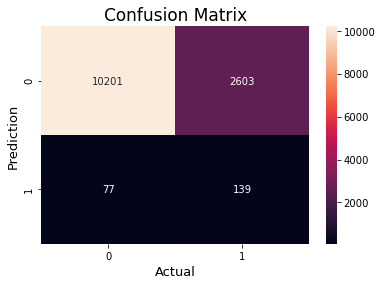

In [35]:
 
#Plot the confusion matrix.
sns.heatmap(cm, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
#len(y_test) is 12900.It will obviously have many 0s and few 1s.That is the reason for less TP
#i.eTP=22 and high Tn i.e TN=12375.The dataset is formed with many 0s.It is not our fault.

In [36]:
print("Count of false negative values when we build logistic reg model on test data is ",cm[0][1]) 

Count of false negative values when we build logistic reg model on test data is  2603


In [ ]:
#let us try predict_proba function

In [45]:

#predict_proba fun returns for each dp for class 0 and classs 1 it displays the probability value.
#high prob value at label 1 means that person at row index 0 will get heart attack.

In [166]:
y_test.head(3)

,Heart_Attack
0,0
1,0
2,0


In [37]:
y_pred[0:7]#predicted op values of test data at position 0 to position 7-1

array([0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [69]:
# y_predprobl[0:7]

In [75]:
# y_predprobl.shape

In [112]:
# len(y_test)

In [78]:
# y_predprobl

In [76]:
# y_predprobl[2,0]
# a 2 d array has 2 parameters.1 st para represents sublist positions
#2 nd parameter represents positions in a list
#in ypredprob 2d array,at index 2 there is a sublist.in the sublist at index 0,a value is displayed.


<!-- # #You told me that predict_proba() returns each data point's 
# probability of class 0 and class 1.
# For data point at row index 0,what is the probability of class 1? 0.99 or 0.0008?
#atochatgpt

#Probability of class 0: approximately 9.99179770e-01 (which is close to 1)
Probability of class 1: approximately 8.20230143e-04 (which is close to 0)
Therefore, for the data point at row index 0, the probability of belonging to class 1 is approximately 8.20230143e-04 or 0.0008. -->
        class 0          class 1

#array([[9.99179770e-01, 8.20230143e-04],
       [4.97744642e-01, 5.02255358e-01],
       [9.98883407e-01, 1.11659339e-03],
       [8.84060817e-01, 1.15939183e-01],
       [9.99288156e-01, 7.11844229e-04]])

In [103]:
# y_predprobl[0:5]
#it displays sublists in a range.start to stop-1.sublist at index 0 to sublist at index 4 i.e 5-1
#dp1-0,dp2-1,dp3-0,dp4-0,dp5-0

In [77]:
# y_predl[0:5]

In [ ]:
#roc_curve,roc_score .we pass prob values in both the functions.

In [52]:
# (8.2*10**-4)*100

0.082

y_predprobl is a aray which has probability values of each record.
1 st record is 99 percent sure it will be label 1
1 st reocrd is 0.08 percent sure it will be label 0
the probability of 1 st record to be label 1 is 99 percent.
#generally models make accurate predictions.
#so 1 st record is label 1...c.j


In [38]:
from sklearn.metrics import roc_auc_score,roc_curve

In [62]:
# y_test.head(2)# #not sorted in ascending order.we need to do it.still u get correct ans

In [119]:
len(y_test)

13020

In [60]:
#roc_auc_score : Compute the area under the ROC curve

In [62]:
#In roc_curve function,i pass for all dp i pass prob of label 1.
#in the roc_curve fun i do not pass prob of label 0.

In [67]:
# Roc curve codes:

In [39]:
# generate a no skill prediction (majority class)
##predicted probability of the positive class is always zero.
ns_probs = [0 for _ in range(len(y_test))]

In [40]:
y_predprob=logreg.predict_proba(x_test)

In [139]:
y_predprob[:7]

array([[0.99889711, 0.00110289],
       [0.56938811, 0.43061189],
       [0.99726298, 0.00273702],
       [0.78788109, 0.21211891],
       [0.80698811, 0.19301189],
       [0.89381744, 0.10618256],
       [0.13367774, 0.86632226]])

In [ ]:
#In the test data,the dp at index 6,model predicts that there is 86.6% chance that
#it will be label 1.These is 13 percent chance that this dp will be label 0.
#logreg.predict_proba(x_test) fucntion predicts for all dp it predicts the probabiltites of label 0 and label 1.
#logreg.predict(x_test) function predcits the target variable labels.


In [ ]:
#A 2d array variable is present.i have preformed slicing in 2 d array.i have sliced range 
# of elements from index position 0 to inde position 7-1.
#In a 2d array,I slice a range of elements  from index 0 to index 7-1

In [41]:
lr_probs =y_predprob[:,1]  
#this is a 1d array which has probability values for label 1

In [42]:
ns_auc = roc_auc_score(y_test.Heart_Attack, ns_probs)
lr_auc = roc_auc_score(y_test.Heart_Attack, lr_probs)

In [147]:
ns_auc

0.5

In [148]:
lr_auc
#lr_auc is the auc score for label 1 of logistic regression model(true)

0.8176824805905561

In [43]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.819


In [44]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.Heart_Attack, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test.Heart_Attack, lr_probs)

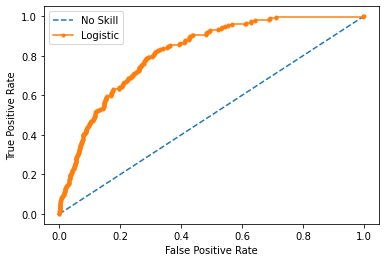

In [45]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [85]:
# roc_auc_score(y_true=y_test.Heart_Attack,y_score=y_predprobl[:,1])



In [ ]:
roc_curve :The function returns three arrays: fpr (false positive rate),tpr (true positive rate) and thresholds.

In [86]:
# fpr, tpr, thresholds =roc_curve(y_true=y_test.Heart_Attack,y_score=y_predprobl[:,1])

In [48]:
fpr[0:5]

array([0.00000000e+00, 7.81005936e-05, 1.56201187e-04, 1.56201187e-04,
       4.68603561e-04])

In [55]:
tpr[200:240]
#tpr value increases but fpr values remains around 0.

array([0.50925926, 0.51388889, 0.51388889, 0.51851852, 0.51851852,
       0.52314815, 0.52314815, 0.52777778, 0.52777778, 0.53240741,
       0.53240741, 0.53703704, 0.53703704, 0.5462963 , 0.5462963 ,
       0.55092593, 0.55092593, 0.55555556, 0.55555556, 0.56481481,
       0.56481481, 0.56944444, 0.56944444, 0.57407407, 0.57407407,
       0.5787037 , 0.5787037 , 0.58333333, 0.58333333, 0.58796296,
       0.58796296, 0.59259259, 0.59259259, 0.59722222, 0.59722222,
       0.60185185, 0.60185185, 0.60648148, 0.60648148, 0.61111111])

In [50]:
thresholds[0:5]

array([1.96650116, 0.96650116, 0.95231706, 0.94402362, 0.94138467])

In [ ]:
#Do not pass y_pred in roc curve and rocauc score functions.(rule)

In [ ]:
#i am not getting a curve.task:what are the values of fpr,tpr and thresh.What r  the values in 
#1 d array

In [46]:
roc_auc_score(y_true=y_test.Heart_Attack,y_score=y_predprobl[:,1])

NameError: name 'y_predprobl' is not defined

In [69]:
#ValueError: y should be a 1d array and  got an array of shape (13020, 2) instead
#You must pass probability values in 1 d array.By default probvalues are in 2 d array.
#u must pass prob values in 1 d array.maybe we must pass prob values of label1 orprob
#values of label 0
#y_true=(n_samples,) or (n_samples, n_classes)
#it means we can pass a series or a df with one column

In [156]:
# y_predprobl[:,1]

In [87]:
# fpr, tpr, thresholds = roc_curve(y_test.Heart_Attack, y_predprobl[:,1],pos_label=1)
#We set pos_label=1,we get correct roc curve
#pos_label=1 means pos_label=1: This parameter specifies which class is considered the positive class.
#In this case, it's set to 1, indicating that class 1 (Heart_Attack) is the positive class.
#we set pos_label=0,we get different(wrong) curve.

In [88]:
# ns_probs[0:5]

In [ ]:
After calling roc_curve with your parameters, it returns three arrays:

fpr: An array of false positive rates for different threshold values.
tpr: An array of true positive rates for different threshold values.
thresholds: An array of thresholds used to compute the false positive and true positive rates.

In [ ]:
 y_predprobl[:,1] displays the predicted probabilities for the positive class for all dp.


roc_curve() has 2 para.1 st para must have act op values.2nd para must be set as 
prob values of label 1.(we can set prob values of label 0 too..not recommended)
(note:)
In roc_auc_score() and roc_curve() functions,in the 2 nd parameter we must pass probability
values of class 1.

In [63]:
fpr[0:5]

array([0.00000000e+00, 7.81005936e-05, 1.56201187e-04, 1.56201187e-04,
       5.46704155e-04])

In [73]:
len(fpr)

411

In [74]:
len(tpr)

411

In [76]:
len(thresholds)

411

In [ ]:
We use predict_proba fun on x test.It is used to plot roc curve.
We use predict fun on x test for acc,fn,precision,recall.

In [ ]:
#######################################################################################################

In [ ]:
#

In [ ]:
I compare the probability of class1 of all the data points with different values of threshold.
I pass these probabilities in roc_curve function.
method2:
when we pass prob values as a 2 d array then we must mention pos_label=1.Only then model
will take for all dp it will take class 1 probabilities.

In [ ]:
true_positive_rate and  false_positive_rate are arrays.
These are calculated from roc_curve().


In [ ]:
roc curve can be plotted for all the labels.
In one graph we can plot roc curve for label 0.
In the same graph we can plot roc curve for label 1.

#predict(test data) returns discrete values (like 0,1) to each record.
#predict_proba() returns probability value or likelihood for each label.

In [ ]:
The AUC score can be computed using the roc_auc_score() method of sklearn.

In [61]:
#predict_proba() returns the probabilities of each category (cat and dog), i.e., 0.95 and 0.05.

In [60]:
#2)Run Random forest model

In [79]:
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators=500,criterion="entropy",min_samples_split=2,min_samples_leaf=1,random_state=45)  
rfc=classifier.fit(x_train_sm, y_train_sm.Heart_Attack) 
#RFModel named rfc gets trained on xtr and y train data

In [80]:
y_pred1= rfc.predict(x_test) 

In [81]:
from sklearn.metrics import confusion_matrix  
cm1= confusion_matrix(y_test, y_pred1)  

In [82]:
cm1

array([[12380,   424],
       [  193,    23]], dtype=int64)

In [ ]:
#Display accuracy,precision,recall,fn of test data when we build random forest model.
#These metrcis are calculat//ed w.r.t test data only.


In [83]:
accuracy_score(y_true=y_test.Heart_Attack,y_pred=y_pred1)

0.9526113671274962

In [84]:
precision_score(y_test.Heart_Attack,y_pred1)

0.05145413870246085

In [85]:
recall_score(y_test.Heart_Attack,y_pred1)

0.10648148148148148

In [86]:
print("Count of false negative values when we build random forest model on test data is ",cm1[0][1]) 

Count of false negative values when we build random forest model on test data is  424


ROC CURVE OF RANDOM FOREST MODEL

In [87]:
y_predprob2=rfc.predict_proba(x_test)

In [173]:
y_predprob2[10:16]

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.6, 0.4],
       [1. , 0. ],
       [0.8, 0.2]])

In [174]:
#y_predprob2 consits of for all dp probability values of label 0 and label 1 based on random forest model.
#for dp at index 15,the rf model predicts that 80 percent chance that it will be label 0
#20 percent chance that it will be label 1.

In [179]:
y_predprob2[0:6][:,1]#this code displays the prob of label1 for 6 test datapoints.

array([0. , 0.3, 0. , 0. , 0. , 0. ])

In [180]:
y_predprob2[:,1][0:6]#this code also displays the prob of label1 for 6 test datapoints.

array([0. , 0.3, 0. , 0. , 0. , 0. ])

In [88]:
# generate a no skill prediction (majority class)
##predicted probability of the positive class is always zero.
ns_probs = [0 for _ in range(len(y_test))]

In [74]:
rf_probs=y_predprob2[:,1]

In [89]:
rf_probs

array([0.   , 0.265, 0.   , ..., 0.   , 0.05 , 0.01 ])

In [90]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.Heart_Attack, ns_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_true=y_test.Heart_Attack,y_score=rf_probs)

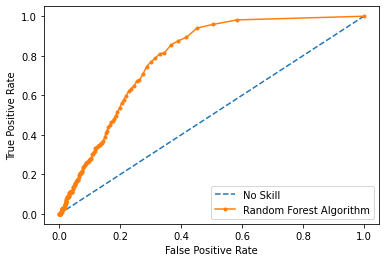

In [91]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest Algorithm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [93]:
roc_auc_score(y_true=y_test.Heart_Attack,y_score=rf_probs)

0.7901507558401888

3) Decision Tree algorithm

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [59]:
#A feature which has high i.g and low gini index is used to split the dataset.

In [96]:
dtc = DecisionTreeClassifier(criterion = "gini",random_state = 100,
                                  max_depth=3, min_samples_leaf=5)

In [97]:
dtree=dtc.fit(x_train_sm,y_train_sm)

In [51]:
#store dt1 model then use predict fun

In [211]:
y_pred3=dtree.predict(x_test)

In [212]:
y_test.shape,y_pred3.shape

((13020, 1), (13020,))

In [55]:
y_test.Heart_Attack.head(10)

12376    0
39144    0
43022    0
31420    0
4920     0
6298     0
30178    0
6653     0
40626    0
32680    0
Name: Heart_Attack, dtype: int64

In [213]:
y_pred3[0:10]

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [219]:
cm2=confusion_matrix(y_test.Heart_Attack,y_pred3)
cm2

array([[8388, 4416],
       [  40,  176]], dtype=int64)

In [220]:
cm2[0][0]

8388

In [120]:
cm2[1][1]

175

In [5]:
# (cmm[0][0]+cmm[1][1])/len(y_pred)#total prediction

In [216]:
accuracy_score(y_test.Heart_Attack,y_pred3)
#81% of data are correctly predicted data points in the test data.
#19% of data are incorrectly predicted datapoints in the test data

0.6577572964669739

In [217]:
recall_score(y_test.Heart_Attack,y_pred3)

0.8148148148148148

In [218]:
precision_score(y_test.Heart_Attack,y_pred3)

0.03832752613240418

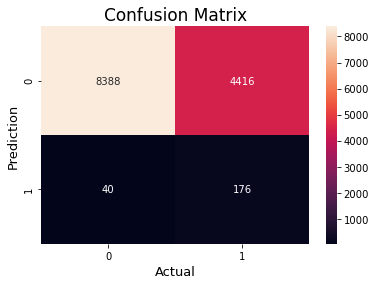

In [228]:
#Plot the confusion matrix.
sns.heatmap(cm2, 
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [230]:
print("Count of false negative values when we build decision tree model on test data is ",cm2[0][1]) 

Count of false negative values when we build decision tree model on test data is  4416


In [ ]:
DT model has low accuracy and high false negatives.Do not consider DT model.Our False negative count must be very very less.

In [ ]:
#You can perform L.e or O.h.e.The accuracy of logreg,rf models will not be affected based on ohe or le.
#Fn means count of fn only.it is wrt count or frequency only.

In [225]:
ROC curve in decision tree algorithm

In [232]:
dtree

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [233]:
y_predprob3=dtree.predict_proba(x_test)

In [236]:
y_predprob3[:,1][0:5]
#for 5 dp iin test data,decision tree model predicts probabilities of label 1.

array([0.01924964, 0.50099782, 0.01924964, 0.3147541 , 0.3147541 ])

In [238]:
y_pred3[0:5]#predicted op labels of 5 dpoints in test data.

array([0, 1, 0, 0, 0], dtype=int64)

In [239]:
# generate a no skill prediction (majority class)
##predicted probability of the positive class is always zero.
ns_probs = [0 for _ in range(len(y_test))]

In [240]:
dt_probs=y_predprob3[:,1]

In [241]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test.Heart_Attack, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_true=y_test.Heart_Attack,y_score=dt_probs)

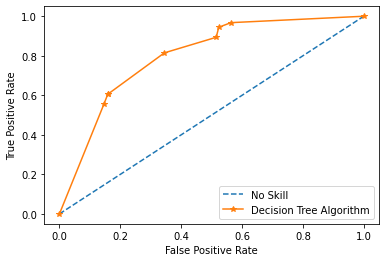

In [242]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(dt_fpr, dt_tpr, marker='*', label='Decision Tree Algorithm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [244]:
roc_auc_score(y_true=y_test.Heart_Attack,y_score=dt_probs)

0.800807328728291

In [ ]:
   Model Name              Accuracy  False negatives  Precision  Recall  ROC AUC Score
1)Logistic Regression      0.79      2622             0.05       0.64    0.81
2)Decision Tree Algorithm  0.67      4192             0.04       0.8     0.8
3)Random Forest Algorithm  0.95      415              0.04       0.08    0.80


In [ ]:
Conclusion:

In [ ]:
Random Forest Classifier is the best model.IT has high accuracy,least number of False negatives and High ROC AUC score.